In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import sys
import random
import math
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
from pandas import Series, DataFrame

#sys.stdout = open('output.txt','w')
xs = []
ys = []
cxs = []
cys = []
#min,max of x axis and y axis
min_x = 0
max_x = 1000
min_y = 0
max_y = 1000 
#min,max of radius
min_r = 0
max_r = 10
#overlap factor(Negative numbers do not overlap)
fact = 0
#min,max of number of data in a cluster
min_n = 5000
max_n = 5000
#number of clusters
k = 250

#output_string = []
var_cluster = False

#Make Output File Name
outputFileName = ""
if var_cluster:
  outputFileName += "c"
  outputFileName += str(k)
else:
  outputFileName += "d"
  outputFileName += str(k*min_n)

outputFileName += ".txt"

f = open(outputFileName, 'w')

X = []
Y = []
Cluster = []
df = {}

In [3]:
import pandas as pd
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    return result

def generateValue(min_r, max_r):
    radius = random.uniform(min_r, max_r)
    return radius

def generateCentroid():

    while True:
        x = random.uniform(min_x, max_x)
        y = random.uniform(min_y, max_y)
        flag = 1
        for i in range(0,len(cxs)):
            if(distance(x,y,cxs[i],cys[i]) < (max_r*2 - fact)):
                flag = 0
        if (flag == 1):
            cxs.append(x)
            cys.append(y)
            return x, y

def genCluster(cn, circle_r, circle_x, circle_y, n):
    for i in range (0,n) :
        # random angle
        alpha = 2 * math.pi * random.random()
        # random radius
        r = circle_r * random.random()
        # calculating coordinates
        x = r * math.cos(alpha) + circle_x
        y = r * math.sin(alpha) + circle_y
        #print ("%f %f c%d" % (x, y, cn))

        X.append(round(x,6))
        Y.append(round(y,6))
        Cluster.append(cn)
        
        temp = str(round(x,6))
        temp += " "
        temp += str(round(y,6))
        temp += " c"
        temp += str(cn)
        temp += "\n"
        f.write(temp)
        #output_string.append(temp)

        xs.append(x)
        ys.append(y)

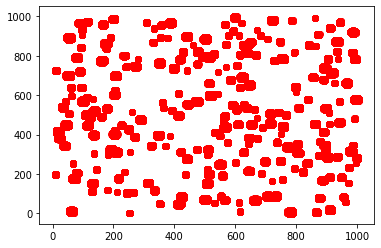

In [4]:
for j in range (0,k):
    r = generateValue(min_r, max_r)
    n = generateValue(min_n, max_n)
    n = int(float(n))
    cx, cy = generateCentroid()
    genCluster(j,r,cx,cy,n)
plt.plot(xs,ys, 'ro')
plt.show()


In [5]:
'''
df['X'] = X
df['Y'] = Y
df['Cluster'] = Cluster

df = DataFrame(df)

df.to_csv('daum_real_time_keyword.csv', index=False, encoding='cp949')'''

"\ndf['X'] = X\ndf['Y'] = Y\ndf['Cluster'] = Cluster\n\ndf = DataFrame(df)\n\ndf.to_csv('daum_real_time_keyword.csv', index=False, encoding='cp949')"

In [6]:
#print(df)

In [7]:
'''
from google.colab import files

with open(outputFileName, 'w') as f:
  for i in output_string:
    f.write(i)


files.download(outputFileName)'''

"\nfrom google.colab import files\n\nwith open(outputFileName, 'w') as f:\n  for i in output_string:\n    f.write(i)\n\n\nfiles.download(outputFileName)"